### 가장 멀리 떨어져 있는 두 점 구하기
- $lemma$. 최장거리 점쌍은 반드시 볼록껍질에 속해있다.
  - 여러개의 점들이 있고, 이 점들 중 가장 멀리 떨어져 있는 두 점쌍 `L`을 구하고 싶다고 해보자.
  - 볼록 껍질상에 존재하지 않는 어떤 점 `x`가 `L` 포함된다고 해보자.
    - 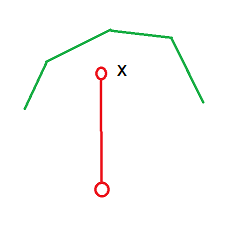
  - 그렇다면 `x`에서 가까운 볼록껍질상의 점들이 진짜 `L`의 후보가 된다. 그림을 그려보면 직관적으로 알 수 있다.
    - 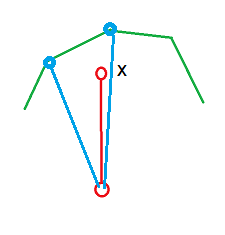
- 그렇다면 볼록 껍질위의 점들 끼리의 거리를 모두 구해보고, 그 중 가장 긴 것을 찾으면 될 것이다.
  - 단순히 조합론으로 풀게되면 $O(n^2)$이 걸린다. 이에 대한 최적화된 알고리즘이 존재한다.

### 회전하는 캘리퍼스(Rotating Calipers)
- 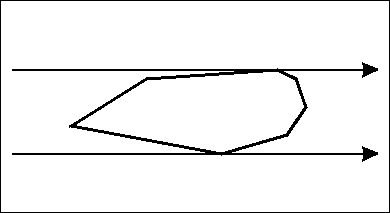
- 점$n$개로 이루어진 볼록껍질이 주어졌을 때, $O(n)$만에 최장거리 점쌍을 구하는 테크닉
1. 점들을 그라함 스캔의 기준으로 정렬하고, 볼록껍질 정점집합 `L`을 구한다.
2. 1번 점을 `A`, 2번 점을 `C`라고 하고, `A`의 다음점을 `B`, `C`의 다음점을 `D`라고 하자.
3. $\overline{AC}$의 거리를 잰다. 
    - 이 거리는 최장거리 점쌍의 후보가 된다.
4. $\overrightarrow{AB}$와 $\overrightarrow{CD}$의 CCW를 이용해 두 벡터가 정 반대에 가까워지도록 `A`를 한칸 돌리거나, `C`를 한칸 돌린다.
    - CCW($\overrightarrow{AB}$, $\overrightarrow{CD}$)가 반시계면 `C`를 한칸 돌리고, 시계면 `A`를 한칸 돌린다.
5. `A`가 처음으로 올 때까지 2번 과정부터 반복한다.
    - `A`를 `L`의 길이만큼 순회하면서 `C`를 가능한 많이 돌리는 식으로 구현한다.

In [ ]:
import math
ccw2 = lambda a, b, c, d: (b[0] - a[0]) * (d[1] - c[1]) - (b[1] - a[1]) * (d[0] - c[0])
def calipers(P) :
  l = len(P)
  i = 1
  d = 0
  for p1, p2 in zip(P, P[1:]+[P[0]]) :
    while ccw2(p1, p2, P[i], P[(i+1) % l]) > 0 :
      i = (i + 1) % l
    
    if d < math.dist(p1, P[i]) :
      d = math.dist(p1, P[i])
  
  return d


### 증명
- https://stonejjun.tistory.com/140